In [1]:
from keras import preprocessing
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [2]:
import pandas as pd
data=pd.read_csv('spam.csv',encoding = "ISO-8859-1")
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [14]:
x=data.iloc[1:5550,1].tolist()
y=data.iloc[1:5550,0]

In [4]:
x

['Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mob

In [5]:
y

1        ham
2       spam
3        ham
4        ham
5       spam
        ... 
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
Name: v1, Length: 5549, dtype: object

In [15]:
import sklearn.preprocessing as pre
import numpy as np
binr=pre.OneHotEncoder()
y=binr.fit_transform(np.c_[y]).toarray()
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [57]:
#x=data.iloc[1:,1].tolist()

In [16]:
from keras.preprocessing.text import Tokenizer
from keras import preprocessing

In [17]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
maxlen=10
x=pad_sequences(sequences,maxlen = 10)
x

array([[ 0,  0,  0, ...,  0, 46,  6],
       [ 0, 48,  8, ...,  2,  2, 73],
       [ 0,  0,  0, ..., 23,  6, 57],
       ...,
       [95, 51, 48, ..., 38,  2, 47],
       [ 0,  0,  0, ..., 59, 14, 51],
       [ 0,  3, 54, ..., 39, 81, 29]])

In [18]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

In [19]:
model = Sequential()
model.add(Embedding(100, 8, input_length=10))
model.add(SimpleRNN(8))

model.add(Dense(2, activation='softmax'))



In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 8)             800       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 954 (3.73 KB)
Trainable params: 954 (3.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(x, y, epochs=20,batch_size=30,validation_split=0.2)


Epoch 1/20
148/148 [==============================] - 4s 11ms/step - loss: 0.3994 - acc: 0.8698 - val_loss: 0.2277 - val_acc: 0.9315
Epoch 2/20
148/148 [==============================] - 1s 7ms/step - loss: 0.1821 - acc: 0.9428 - val_loss: 0.1473 - val_acc: 0.9532
Epoch 3/20
148/148 [==============================] - 1s 7ms/step - loss: 0.1288 - acc: 0.9590 - val_loss: 0.1217 - val_acc: 0.9559
Epoch 4/20
148/148 [==============================] - 1s 7ms/step - loss: 0.1106 - acc: 0.9637 - val_loss: 0.1147 - val_acc: 0.9595
Epoch 5/20
148/148 [==============================] - 1s 8ms/step - loss: 0.1023 - acc: 0.9642 - val_loss: 0.1091 - val_acc: 0.9577
Epoch 6/20
148/148 [==============================] - 1s 8ms/step - loss: 0.0971 - acc: 0.9667 - val_loss: 0.1075 - val_acc: 0.9586
Epoch 7/20
148/148 [==============================] - 1s 8ms/step - loss: 0.0930 - acc: 0.9682 - val_loss: 0.1049 - val_acc: 0.9595
Epoch 8/20
148/148 [==============================] - 1s 8ms/step - loss: 0

In [23]:
sequences = tokenizer.texts_to_sequences(data.iloc[5567:5568,1].tolist())   # 1 means 2nd column which contain email content and 0 means email lable which is y
maxlen=10
x_test=pad_sequences(sequences,maxlen = 10)
x_test

array([[17, 20,  6,  6, 17,  5, 20,  9, 16, 65]])

In [24]:
pred_y=model.predict(x_test)

1/1 [==============================] - 0s 332ms/step


In [25]:

pred_y_Class=binr.inverse_transform(pred_y).reshape(1,-1)
pred_y_Class


array([['spam']], dtype=object)

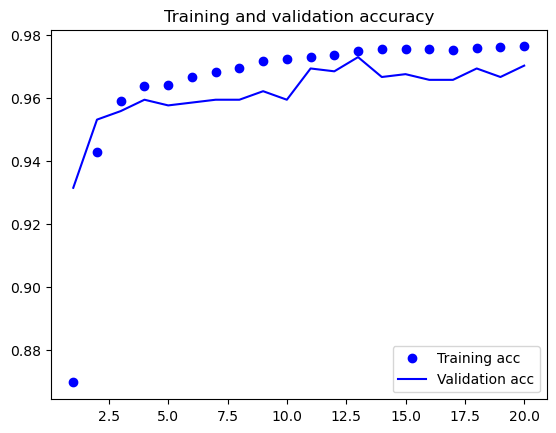

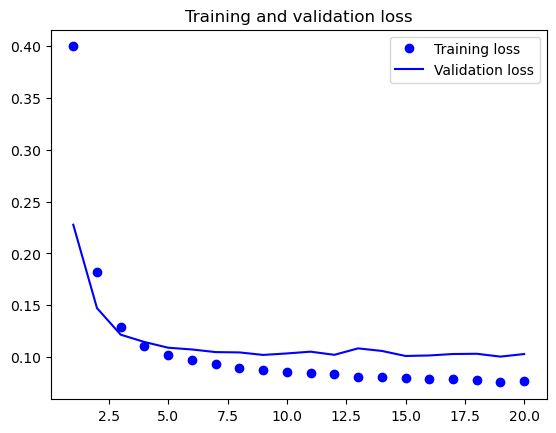

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()